In [1]:
from sys import path
path.append('/home/danieln/python/compendium')

# Pontuações

- Indexação começa em `0`; e
- Datas seguem o padrão americano, de acordo com o módulo `datetime`.

# Importando as coisas que importam!

In [2]:
from cachaça import Escavador
from time import sleep
import regression as reg # módulo autoral
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import schedule
import datetime

----------------

# Atualizando nossos dados

Aqui adicionaremos os preços de hoje ao nosso banco de dados, caso ainda não tenha sido adicionado.

In [3]:
escavador = Escavador('katia.csv', pesquisar_preços_agora=False)

## Atualização diária

Aqui, há a opção de atualizar diariamente usando o `schedule`.

In [5]:
escavador.autoatualização()

Vasculhando os preços...
 > 1000 Montes Carvalho 3Aob 500ml                     custando R$ 99.95
 > Bem Me Quer Prata 700ml                             custando R$ 39.7
 > Bem Me Quer Umburana 600ml                          custando R$ 34.0
 > Caialua Prata 750ml                                 custando R$ 59.0
 > Claudionor 600ml                                    custando R$ 49.9
 > Colombina Cristal 700ml                             custando R$ 69.9
 > Coqueiro 700ml                                      custando R$ 66.0
 > Engenho São Luiz Amendoim 600ml                     esgotada!
 > Leandro Batista 750ml                               custando R$ 98.0
 > Mato Dentro Prata 900ml                             custando R$ 64.0
 > Matriarca Jaqueira 750ml                            custando R$ 89.0
 > Princesa Isabel Prata 750ml                         custando R$ 90.0
 > Rainha 600ml                                        custando R$ 46.4
 > Salineira 600ml                           

KeyboardInterrupt: 

----------

# Brincando com o dataframe e com os dados

In [32]:
coração = escavador.coração()
coração

,2021-02-12,2021-06-18,2021-06-22,2021-07-11,2021-07-17,2021-08-10,2021-08-14,2021-08-18
0,65.0,99.0,99.0,99.0,79.2,99.95,99.95,99.95
1,39.7,39.7,39.7,39.7,39.7,39.70,39.70,39.70
2,32.0,32.0,32.0,32.0,34.0,34.00,34.00,34.00
3,59.0,59.0,59.0,59.0,59.0,59.00,59.00,59.00
4,49.9,49.9,49.9,49.9,49.9,49.90,49.90,49.90
5,49.9,69.9,69.9,69.9,69.9,69.90,69.90,69.90
6,65.0,66.0,66.0,66.0,66.0,66.00,66.00,66.00
7,62.0,62.0,62.0,0.0,0.0,0.00,0.00,0.00
8,0.0,98.0,98.0,98.0,98.0,98.00,98.00,98.00
9,57.6,57.6,57.6,57.6,57.6,64.00,64.00,64.00


In [54]:
def distância_em_dias(d: str, d_ref=datetime.date(2021, 2, 12)) -> int:
    """Retorna a distância, em dias, ao valor de referência (2021-02-12 : 12 de fevereiro de 2021).
    """
    def str_to_datetime(data):
        ano, mes, dia = d.split('-')
        return datetime.date(int(ano), int(mes), int(dia))
    
    if isinstance(d_ref, str):
        d_ref = str_to_datetime(d_ref)
        
    d = str_to_datetime(d)
    dist = abs(d_ref - d)
    return dist.days
    
def plot_row(escavador, col: int, graus: int):
    """Plota os preços da coluna indicada, com uma regressão polinomial.
    """
    coração = escavador.coração() # tiramos o url e o nome da cachaça
    inicio_moritonamento = coração.columns[0]
    dados = {distância_em_dias(x): y for x, y in zip(coração.columns, coração.iloc[col,:]) if y > 0} # os dados da linha
    dxs, dys = list(dados.keys()), list(dados.values())  # em forma de lista
    
    # Agora vamos construir a regressão polinomial
    plt.plot(dxs, dys, 'ro', label='Preço exato') # controle
    f_reg = reg.reg_poly(dxs, dys, graus)
    xs = np.linspace(0, dxs[-1]+31, num=100)
    ys = f_reg(xs)
    
    # E ao plot
    plt.plot(xs, ys, label=f'Regressão de grau {graus}')
    plt.title(f"Preços da {escavador.df.iloc[col][0]}.")
    plt.xlabel(f"Dias a partir de {inicio_moritonamento}")
    plt.ylabel("Preço (R$)")
    plt.legend()

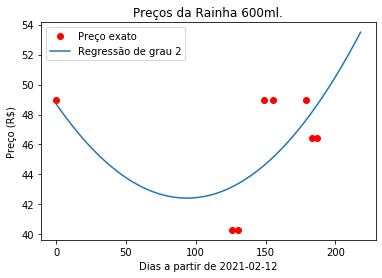

In [55]:
plot_row(escavador, 12, 2)